In [31]:
print('Research Question: What makes a superhost? Is there a specific set of values a host must meet to become a superhost?')

Research Question: What makes a superhost? Is there a specific set of values a host must meet to become a superhost?


In [32]:
print('loading Data and Importing Functions')

loading Data and Importing Functions


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
cd ..

/Users/admin/Desktop/Data301/project-group36-project/analysis


In [3]:
cd ..

/Users/admin/Desktop/Data301/project-group36-project


In [4]:
df=pd.read_csv('data/raw/Athenslistings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10595,https://www.airbnb.com/rooms/10595,2.021030e+13,2021-03-22,"96m2, 3BR, 2BA, Metro, WI-FI etc...",Athens Furnished Apartment No6 is 3-bedroom ap...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/f7e19a44-5afe...,37177,https://www.airbnb.com/users/show/37177,...,10.0,9.0,10.0,478825,t,6,6,0,0,0.21
1,10990,https://www.airbnb.com/rooms/10990,2.021030e+13,2021-03-22,Athens Quality Apartments - Deluxe Apartment,Athens Quality Apartments - Deluxe apartment i...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/8645179/c1728...,37177,https://www.airbnb.com/users/show/37177,...,10.0,10.0,10.0,400315,t,6,6,0,0,0.42
2,10993,https://www.airbnb.com/rooms/10993,2.021030e+13,2021-03-22,Athens Quality Apartments - Studio,The Studio is an <br />-excellent located <br ...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/107309527/848...,37177,https://www.airbnb.com/users/show/37177,...,10.0,10.0,10.0,478790,t,6,6,0,0,0.56
3,10995,https://www.airbnb.com/rooms/10995,2.021030e+13,2021-03-22,"AQA-No2 1-bedroom, smart tv, fiber connection,","AQA No2 is 1-bedroom apartment (47m2), on the ...",Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/6a565613-aaa3...,37177,https://www.airbnb.com/users/show/37177,...,10.0,10.0,10.0,479159,t,6,6,0,0,0.18
4,27262,https://www.airbnb.com/rooms/27262,2.021030e+13,2021-03-22,"54m2, 1-br, cable tv, wi-fi, metro",Big 1-bedroom apartment that can accommodate 4...,NaN,https://a0.muscache.com/pictures/8651803/4b82b...,37177,https://www.airbnb.com/users/show/37177,...,10.0,9.0,9.0,492624,t,6,6,0,0,0.16


In [35]:
list(df.columns)
## looking for the columns that make a superhost  

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30',
 'availa

In [12]:
df1 = df[['host_is_superhost','review_scores_rating','host_response_rate','number_of_reviews','host_acceptance_rate']]
df1
## pulling out columns needed for analysis

,host_is_superhost,review_scores_rating,host_response_rate,number_of_reviews,host_acceptance_rate
0,t,97.0,100%,25,96%
1,t,98.0,100%,44,96%
2,t,97.0,100%,58,96%
3,t,96.0,100%,23,96%
4,t,95.0,100%,17,96%
...,...,...,...,...,...
9505,f,NaN,100%,0,100%
9506,f,NaN,100%,0,99%
9507,t,NaN,100%,0,100%
9508,f,NaN,NaN,0,NaN


In [13]:
df1 = df1[df1['number_of_reviews'] > 10]  
df1
## places with less then 10 reviews should not be counted as they do not have enough to go off of

,host_is_superhost,review_scores_rating,host_response_rate,number_of_reviews,host_acceptance_rate
0,t,97.0,100%,25,96%
1,t,98.0,100%,44,96%
2,t,97.0,100%,58,96%
3,t,96.0,100%,23,96%
4,t,95.0,100%,17,96%
...,...,...,...,...,...
9151,t,96.0,100%,14,100%
9188,f,96.0,100%,14,100%
9210,t,88.0,100%,12,100%
9261,f,68.0,83%,13,98%


In [14]:
df1['host_response_rate']=df1['host_response_rate'].replace({r'\%':''}, regex=True)
df1['host_acceptance_rate']=df1['host_acceptance_rate'].replace({r'\%':''}, regex=True)
df1
## getting rid of the percentage sign

<ipython-input-14-8509002f61be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['host_response_rate']=df1['host_response_rate'].replace({r'\%':''}, regex=True)
<ipython-input-14-8509002f61be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['host_acceptance_rate']=df1['host_acceptance_rate'].replace({r'\%':''}, regex=True)


,host_is_superhost,review_scores_rating,host_response_rate,number_of_reviews,host_acceptance_rate
0,t,97.0,100,25,96
1,t,98.0,100,44,96
2,t,97.0,100,58,96
3,t,96.0,100,23,96
4,t,95.0,100,17,96
...,...,...,...,...,...
9151,t,96.0,100,14,100
9188,f,96.0,100,14,100
9210,t,88.0,100,12,100
9261,f,68.0,83,13,98


In [15]:
df1['host_response_rate'] = pd.to_numeric(df1['host_response_rate'])
df1['host_acceptance_rate'] = pd.to_numeric(df1['host_acceptance_rate'])
df1
## changing host response rate from a string to a numeric value 

<ipython-input-15-2f44439a1b31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['host_response_rate'] = pd.to_numeric(df1['host_response_rate'])
<ipython-input-15-2f44439a1b31>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['host_acceptance_rate'] = pd.to_numeric(df1['host_acceptance_rate'])


,host_is_superhost,review_scores_rating,host_response_rate,number_of_reviews,host_acceptance_rate
0,t,97.0,100.0,25,96.0
1,t,98.0,100.0,44,96.0
2,t,97.0,100.0,58,96.0
3,t,96.0,100.0,23,96.0
4,t,95.0,100.0,17,96.0
...,...,...,...,...,...
9151,t,96.0,100.0,14,100.0
9188,f,96.0,100.0,14,100.0
9210,t,88.0,100.0,12,100.0
9261,f,68.0,83.0,13,98.0


In [16]:
df1.dropna().reset_index(drop=True)
## removing all unnecessary values

,host_is_superhost,review_scores_rating,host_response_rate,number_of_reviews,host_acceptance_rate
0,t,97.0,100.0,25,96.0
1,t,98.0,100.0,44,96.0
2,t,97.0,100.0,58,96.0
3,t,96.0,100.0,23,96.0
4,t,95.0,100.0,17,96.0
...,...,...,...,...,...
3367,t,96.0,100.0,14,100.0
3368,f,96.0,100.0,14,100.0
3369,t,88.0,100.0,12,100.0
3370,f,68.0,83.0,13,98.0


In [36]:
print('Method Chaining') 

Method Chaining


In [27]:
def load_and_process(url_or_path_to_csv_file):
    
    df1 = (
    pd.read_csv('Athenslistings.csv')
    .dropna()
    .reset_index(drop=True)
    .drop(columns =['id','listing_url','scrape_id','last_scraped','name',
         'description','neighborhood_overview','picture_url','host_id',
         'host_url','host_name','host_since','host_location','host_about',
        'host_response_time','host_thumbnail_url','host_picture_url','host_neighbourhood',
        'host_listings_count','host_total_listings_count','host_verifications','host_has_profile_pic','host_identity_verified','neighbourhood',
        'neighbourhood_cleansed','neighbourhood_group_cleansed','latitude','longitude','property_type','room_type','accommodates','bathrooms','bathrooms_text',
        'bedrooms','beds','amenities','price','minimum_nights','maximum_nights','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights',
         'maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_updated',
         'has_availability','availability_30','availability_60','availability_90','availability_365',
         'calendar_last_scraped','number_of_reviews_ltm','number_of_reviews_l30d','first_review',
        'last_review','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
         'review_scores_communication','review_scores_location','review_scores_value','license','instant_bookable',
         'calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
         'calculated_host_listings_count_shared_rooms','reviews_per_month'])
    )
    
    df2 =(
    df1
    .loc[df1.number_of_reviews > 10]
    .replace({r'\%':''}, regex=True)
    .to_numeric(df1['host_acceptance_rate'])
    .to_numeric(df1['host_response_rate'])
    .reset_index(drop=True)
               )
    
    return df2

In [37]:
print('Start of EDA') 

Start of EDA


In [17]:
df1.shape

(4569, 5)

In [18]:
df1.describe()
## description of values 

,review_scores_rating,host_response_rate,number_of_reviews,host_acceptance_rate
count,4569.000000,3584.000000,4569.000000,3739.000000
mean,95.989276,95.289342,76.311884,94.548542
std,3.755454,16.299278,76.880338,16.474634
min,63.000000,0.000000,11.000000,0.000000
25%,95.000000,99.000000,23.000000,98.000000
50%,97.000000,100.000000,48.000000,100.000000
75%,99.000000,100.000000,101.000000,100.000000
max,100.000000,100.000000,716.000000,100.000000


Chart1: There are around 2450 hosts that are superhosts inferring there are more individuals that are superhosts, possibilty also concluding that it is easy to become a superhost.


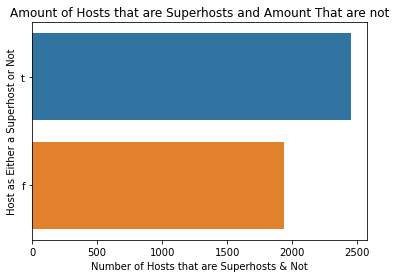

In [38]:
sns.countplot(y='host_is_superhost',data=df1)
plt.title('Amount of Hosts that are Superhosts and Amount That are not')
plt.xlabel('Number of Hosts that are Superhosts & Not')
plt.ylabel('Host as Either a Superhost or Not')
print('Chart1: There are around 2450 hosts that are superhosts inferring there are more individuals that are superhosts, possibilty also concluding that it is easy to become a superhost.') 

Chart 2: Correlation graph displaying how response rate and review scores benefit a superhost, the higher the score and the faster the response time the more likely to be a superhost


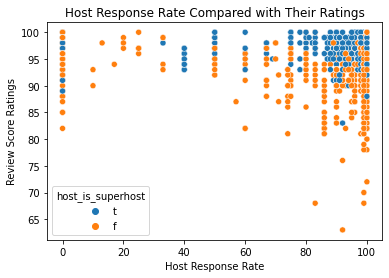

In [30]:
ax = sns.scatterplot(x="host_response_rate", y="review_scores_rating", data=df1, hue="host_is_superhost")
ax.set_title("Host Response Rate Compared with Their Ratings")
ax.set_xlabel("Host Response Rate")
ax.set_ylabel("Review Score Ratings")
print('Chart 2: Correlation graph displaying how response rate and review scores benefit a superhost, the higher the score and the faster the response time the more likely to be a superhost') 

Chart 3: Correlation graph displaying how acceptance rate and response rate affect if host is a superhost or not


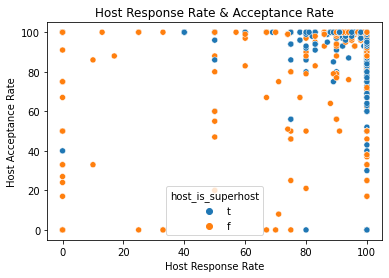

In [29]:
f=sns.scatterplot(x="host_response_rate", y="host_acceptance_rate", data=df1, hue="host_is_superhost")
f.set_title("Host Response Rate & Acceptance Rate")
f.set_xlabel("Host Response Rate")
f.set_ylabel("Host Acceptance Rate")
print('Chart 3: Correlation graph displaying how acceptance rate and response rate affect if host is a superhost or not') 

In [28]:
print('Research Question: What makes a superhost? Is there a specific set of values a host must meet to become a superhost?  According to Airbnb website (https://www.airbnb.ca/help/article/829/how-do-i-become-a-superhost?locale=en&_set_bev_on_new_domain=1628722520_MTNkZDNhOTkzNTFm), individuals must meet four criteria to become a superhost. Hosts with a quick response rate and high reviews are more likely to become a superhost but that is not the only criteria. As viewed in chart 2 there are hosts with a high response time and high reviews that are not a superhost which may mean that there are much more criteria then listed by Airbnb. In chart 3 it is seen that if a host has a high response rate they may also have a high acceptance rate which has a factor for becoming a superhost.Hosts with low acceptance rate and response rate are more likely to not be superhosts. Although there is criteria to become a superhost there are outliers that follow that criteria that are not superhosts inferring that there may be other hidden criteria.')

Research Question: What makes a superhost? Is there a specific set of values a host must meet to become a superhost?  According to Airbnb website (https://www.airbnb.ca/help/article/829/how-do-i-become-a-superhost?locale=en&_set_bev_on_new_domain=1628722520_MTNkZDNhOTkzNTFm), individuals must meet four criteria to become a superhost. Hosts with a quick response rate and high reviews are more likely to become a superhost but that is not the only criteria. As viewed in chart 2 there are hosts with a high response time and high reviews that are not a superhost which may mean that there are much more criteria then listed by Airbnb. In chart 3 it is seen that if a host has a high response rate they may also have a high acceptance rate which has a factor for becoming a superhost.Hosts with low acceptance rate and response rate are more likely to not be superhosts. Although there is criteria to become a superhost there are outliers that follow that criteria that are not superhosts inferring t